Les plot en Python !<a id="top"></a>
===

Évidemment, nous allons parler ici de LA librairie Python pour faire des graphiques (plots) : *Matplotlib* ; Mais pas que ! je vais aussi tenter de vous en présenter d'autres toute aussi intéressantes bien que pas toujours populaires.

On va notamment parler de Seaborn, très utilisée en data science, ou encore Plotly, très sympa en data viz. Cependant, le mieux est de savoir utiliser Matplotlib. En effet, beaucoup d'autres librairies sont basées sur Matplotlib. Donc nous détaillerons pas mal cette dernière.

Avant de commencer, assurer vous de connaitre Pandas (dans les grandes lignes) et surtout Numpy.

**Sommaire**
- [1. Matplotlib](#chap1)
    - [1.1. Pyplot - bases](#chap1-1)
    - [1.2. Pyplot - structure](#chap1-2)
    - [1.3. POO](#chap1-3)
    - [1.4. Scatter](#chap1-4)
    - [1.5. Histogrammes](#chap1-5)
    - [1.6. Image show](#chap1-6)
    - [1.7. Graphe 3D](#chap1-7)
    - [1.8. Contour plot](#chap1-8)
- [2. Seaborn](#chap2plot)
    - [2.1. Seaborn - Bases](#chap2-1plot)
    - [2.2. Seaborn - Overview](#chap2-2plot)

In [ ]:
from tools import find_file

[Back to top](#top)

---

## 1. Matplotlib<a id="chap1"></a>

Avant de commencer, encore une fois, regardez la doc ! 

Il y a deux principales méthodes pour faire des graphes, avec PyPlot et en POO. Ne mixez pas les deux, c'est pas une bonne idée.

### 1.1. Pyplot - bases<a id="chap1-1"></a>

In [2]:
# import souvent nommé plt :
import matplotlib.pyplot as plt
import numpy as np

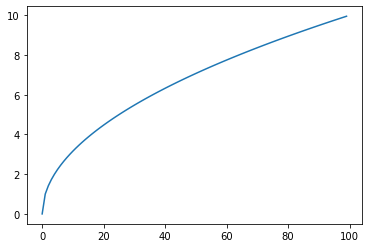

In [3]:
# on créé un jeu de data
x = np.arange(0, 100)
y = x**(1/2)

# on l'affiche avec PyPlot
plt.plot(x, y)

Wow, on a une magnifique fonction racine carré !

Maintenant voyons rapidement les options intéressantes (retenons surtout celle pour modifier la couleur) :

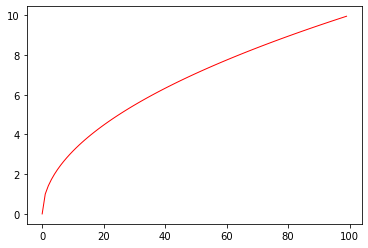

In [4]:
plt.plot(x, y, c='r', lw=1) 

Il est à noter que l'on peut aussi l'écrire plus détaillé : 
```python
plt.plot(x, y, color='red', linewidth=1)
```
ça fera exactement la même chose !

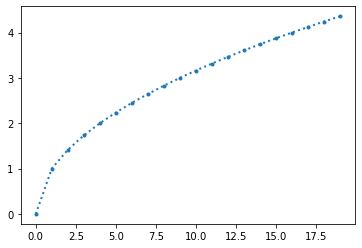

In [5]:
# Affichons aussi les points :
plt.plot(x[:20], y[:20], lw=2, marker='.', ls=':')  # ls pour linestyle

[Back to top](#top)

---
### 1.2. Pyplot - structure<a id="chap1-2"></a>
Il existe une structure de base qu'il peut être intéressant de suivre, notamment pour bien saisir le cycle de vie des figures:

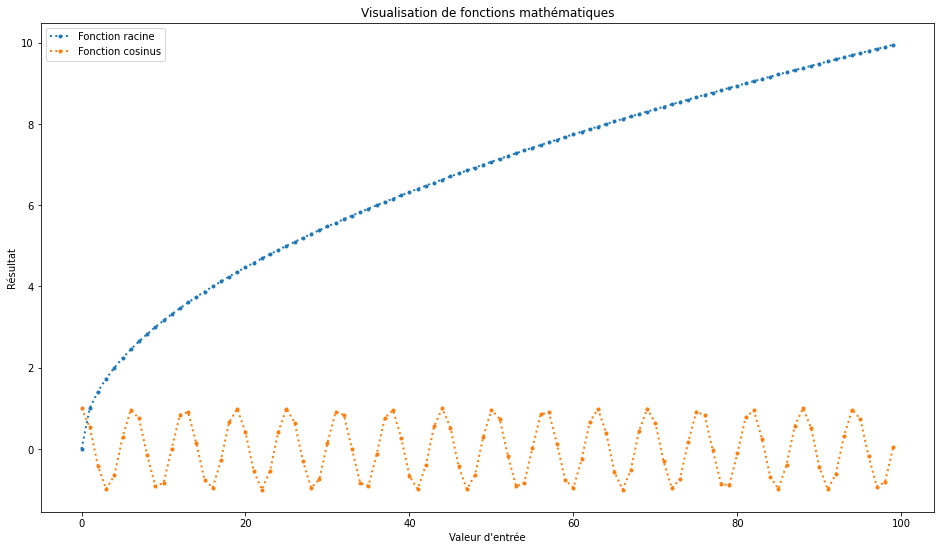

<Figure size 432x288 with 0 Axes>

In [6]:
# --- Figure ---
# On commence à créer la fenetre (la figure). On va pouvoir ici déterminer
# ses dimensions :
plt.figure(figsize=(16,9))


# --- Contenu ---
# Maintenant on va mettre un plot dans notre figure :
plt.plot(x, y, lw=2, marker='.', ls=':', label="Fonction racine")

# Et même un second !
plt.plot(x, np.cos(x), lw=2, marker='.', ls=':', label="Fonction cosinus")


# --- Détails ---
# Maintenant, ajoutons des titres, labels, légendes :
plt.title('Visualisation de fonctions mathématiques')

plt.xlabel('Valeur d\'entrée')
plt.ylabel('Résultat')

plt.legend()


# --- Sauvegarde et affichage ---
# Pas utile dans Jupyter mais il est bien de le mettre :
plt.show()  # Affiche la figure

# Sauvegarde dans un fichier la figure :
plt.savefig('Cours_plot.png')

Il est intéressant de noter que si l'on avait mis `plt.show()` entre les deux plots, on aurait eu deux figures :

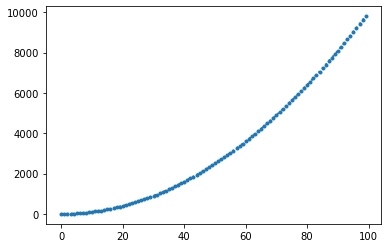

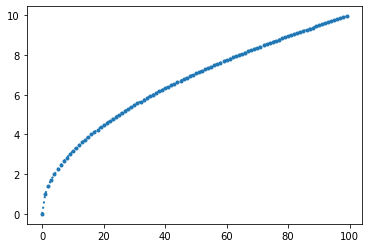

In [7]:
plt.plot(x, x**2, lw=2, marker='.', ls=':', label="Fonction cosinus")
plt.show()

plt.plot(x, np.sqrt(x), lw=2, marker='.', ls=':', label="Fonction sinus")
plt.show()

Enfin on peut préciser des subplots :
```python
plt.subplot(nb_lignes, nb_colonnes, place)
```

La structure est donc :
```
--- Figure ---
plt.figure()



--- Contenu ---
 -  Contenu 1 -
plt.subplot()
plt.plot()

 - Contenu 2 -
plt.subplot()
plt.plot()

  .  .  .



--- Détails ---
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.legend()



--- Sauvegarde et affichage ---
plt.show()
plt.savefig()
```

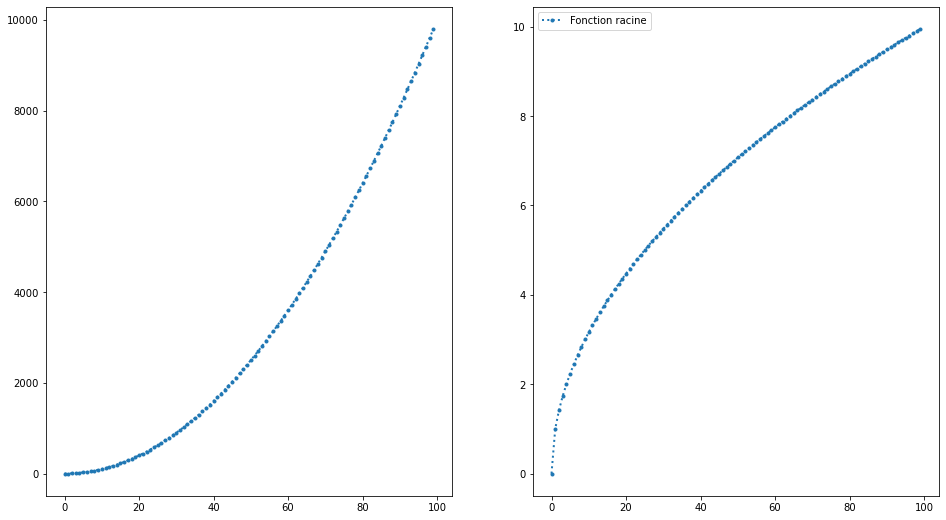

In [8]:
plt.figure(figsize=(16,9))


plt.subplot(1, 2, 1)
plt.plot(x, x**2, lw=2, marker='.', ls=':', label="Fonction carré")

plt.subplot(1, 2, 2)
plt.plot(x, np.sqrt(x), lw=2, marker='.', ls=':', label="Fonction racine")


plt.legend()


plt.show()

[Back to top](#top)

---
### 1.3. POO<a id="chap1-3"></a>

Cette méthode permet de faires des choses un peu plus complexes, en nous autorisant à créer plusieurs plots avec les mêmes axes. Cependant, généralement ce n'est pas utile et autant rester avec Pyplot, plus simple et suffisant.

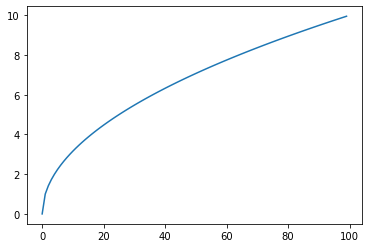

In [9]:
fig, ax = plt.subplots()  # subplotS et pas subplot !

ax.plot(x, np.sqrt(x))

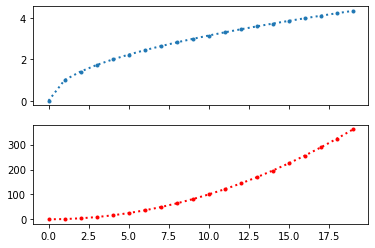

In [10]:
fig, ax = plt.subplots(2, 1, sharex=True)  # subplotS et pas subplot !

# ATTENTION, ax est un tableau numpy !
ax[0].plot(x[:20], np.sqrt(x)[:20], lw=2, marker='.', ls=':', label="Fonction racine")
ax[1].plot(x[:20], (x**2)[:20], c='r', lw=2, marker='.', ls=':', label="Fonction carré")

[Back to top](#top)

---
### 1.4. Scatter<a id="chap1-4"></a>

Scatter permet de faire des nuages de points. Il est intéressant pour visualiser les tendance d'un ensemble de données et notamment pour faire de la classification :

In [11]:
# Testons avec un dataset connu de scikit : les Iris
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data
y = iris.target

# on explore rapidement les données :
print(x[:5])  # Paramètres
print(y[:5])  # Type des variables

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


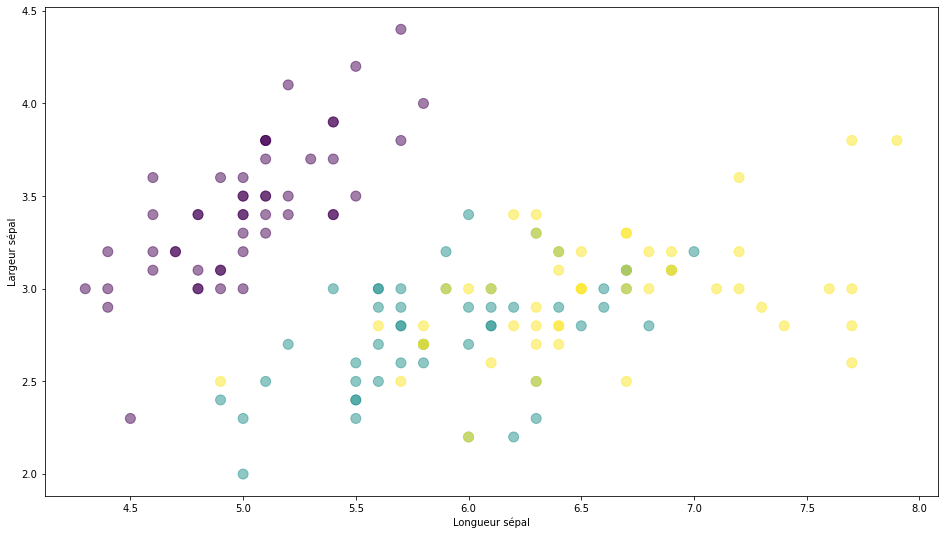

In [12]:
plt.figure(figsize=(16, 9))

plt.scatter(x[:, 0], x[:, 1], c=y, alpha=.5, s=100)  # Couleur selon valeur y + transparence

plt.xlabel('Longueur sépal')
plt.ylabel('Largeur sépal')

plt.show()

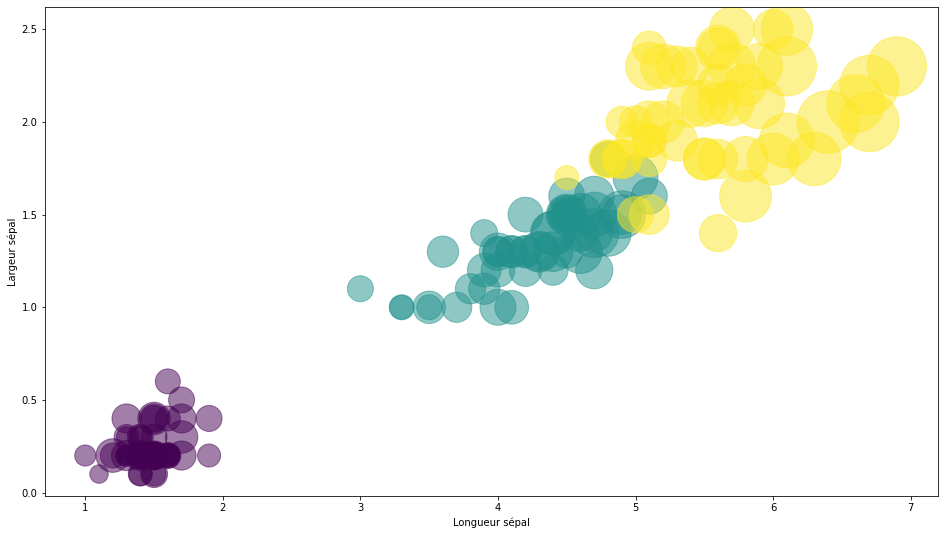

In [13]:
plt.figure(figsize=(16, 9))

plt.scatter(x[:, 2], x[:, 3], c=y, alpha=.5, s=x[:,0]**4)  # Taille du point selon la longueur

plt.xlabel('Longueur sépal')
plt.ylabel('Largeur sépal')

plt.show()

Ahhhh, ici on voit clairement les différentes classes !

Bon continuons !

[Back to top](#top)

---
### 1.5. Les histogrammes<a id="chap1-5"></a>

Parlons du second graphique le plus répendu, l'**histogramme** ! Souvent utilisé pour visualiser la distribution des données, cet outil permet de rapidement voir si on a une distribution plutôt normale, plutôt uniforme, plutôt dégressive/progressive, plutôt discontinue...



Text(0, 0.5, "Nombre d'apparition")

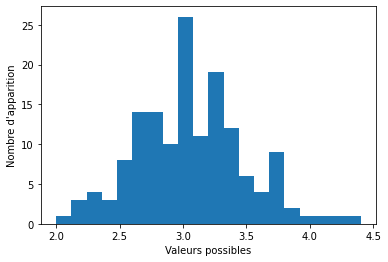

In [14]:
plt.hist(x[:, 1], bins=20)  # bins permet de dire le nombre de colonnes

plt.xlabel("Valeurs possibles")
plt.ylabel("Nombre d'apparition")

Tiens, pour ceux qui font de la photographie, "histgramme" ça ne vous dit pas un truc ?

Et oui ! C'est le graph qui permet d'afficher le nombre d'apparition de chaque couleurs ! Testons avec le ratons laveur que nous avions déjà vu !

Text(0.5, 0, 'Tonalité')

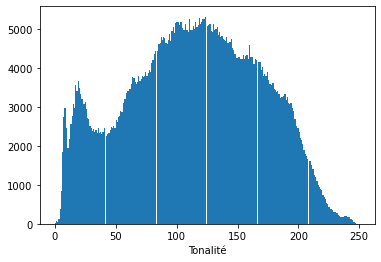

In [15]:
from scipy import misc

face = misc.face(gray=True)
face = face.ravel()  # on "applatit" l'image

plt.hist(face, bins=256)  # bins = 256 car il y a 256 valeurs possibles
plt.xlabel("Tonalité")

Donc là on voit que l'on a une photo plutot bien exposée, avec tout de même pas mal de noirs.

On peut aussi faire des histogrammes en 2D, c'est ce que l'on nomme plus régulièrement une **heatmap**. Voyons ça :

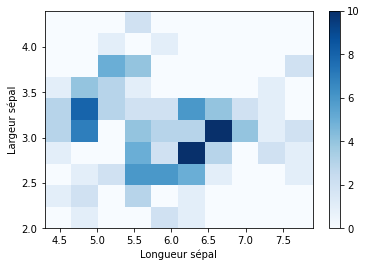

In [16]:
plt.hist2d(x[:, 0], x[:, 1], cmap='Blues')

plt.xlabel('Longueur sépal')
plt.ylabel('Largeur sépal')

plt.colorbar()

[Back to top](#top)

---
### 1.6. Image show<a id="chap1-6"></a>

Et bien tient, en parlant d'images, parlons d'`imshow` ! 

Une utilisation basique parmet de visualiser une image :

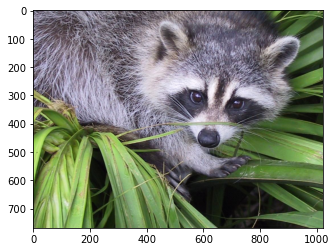

In [17]:
plt.imshow(misc.face())

Mais pas que ! En effet, rappelons qu'une image est un tableau d'entier. On peut donc aussi visualiser une matrice de correlation, visualiser un masque avant un bool indexing, visualiser une optimisation, visualiser une fonction (genre une fractale)...

Testons avec une matrice de correlation avec nos data d'iris, précédentes:

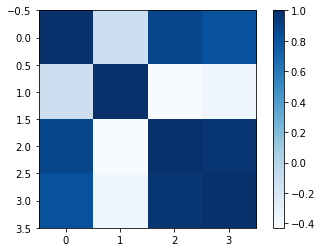

In [18]:
plt.imshow(np.corrcoef(x.T), cmap='Blues')
plt.colorbar()

Bon, ici il n'y a que 4 variables, mais c'est déjà ça ! Ici on peut voir qu'il y a une correlation en la longueur de la sépale (0) et la longueur de la pétale (2), mais aucune entre la largeur de la sépale (1) et la longueur (2) et la largeur de la pétale (3).

[Back to top](#top)

---
### 1.7. Graphes 3D<a id="chap1-7"></a>
On va aller chercher dans les toolkits de matplotlib : Axes3D

In [19]:
from mpl_toolkits.mplot3d import Axes3D

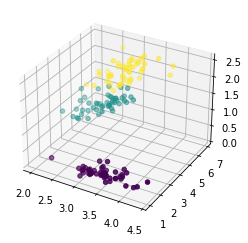

In [20]:
ax = plt.axes(projection='3d')  # et là oui.. on doit utiliser la prog objet...
ax.scatter(x[:, 1], x[:, 2], x[:, 3], c=y)

On peut rajouter ceci pour pouvoir se balader dans le graph :
```python
%matplotlib

ax = plt.axes(projection='3d')  # et là oui.. on doit utiliser la prog objet...
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y)
```

Bon passons à quelque chose de bien joli, la visu 3D d'une fonction mathématique :

In [21]:
# Créons une lambda function rapide
# https://www.benjoffe.com/code/tools/functions3d/examples
f = lambda x, y: np.sin(10*(x**2 + y**2)) / 10

# On créé nos variable x / y
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)

# Et maintenant, avant d'afficher le tout, on va créer une grille de taille X*Y 
x, y = np.meshgrid(x, y)

# On execute :
z = f(x, y)

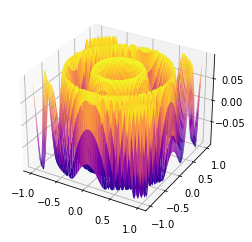

In [22]:
# Visualisons

ax = plt.axes(projection='3d')  # et là oui.. on doit utiliser la prog objet...
ax.plot_surface(x, y, z, cmap='plasma')

[Back to top](#top)

---
### 1.8. Contours plot<a id="chap1-8"></a>
Pour rester dans la 3D, voyons les contours plot. En gros, c'est des graphs 3D vu du dessus. On peut y voir une sorte de carte semblable aux cartes IGN avec des lignes d'altitude pour représenter un lieu.

In [23]:
# Créons une lambda function rapide
# https://www.benjoffe.com/code/tools/functions3d/examples
f = lambda x, y: np.sin(x) + np.cos(x + y) * np.cos(x)

# On créé nos variable x / y
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)

# Et maintenant, avant d'afficher le tout, on va créer une grille de taille X*Y 
x, y = np.meshgrid(x, y)

# On execute :
z = f(x, y)

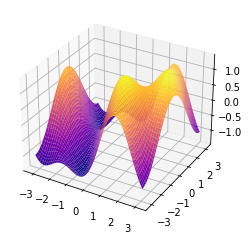

In [24]:
ax = plt.axes(projection='3d')  # et là oui.. on doit utiliser la prog objet...
ax.plot_surface(x, y, z, cmap='plasma')

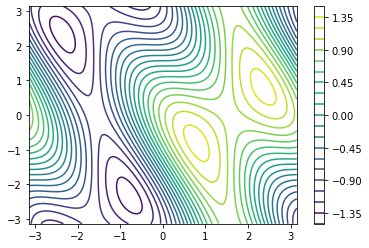

In [25]:
plt.contour(x, y, z, 20)  # 20 niveaux
plt.colorbar()

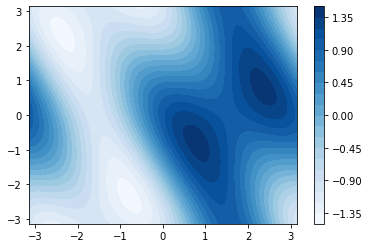

In [26]:
plt.contourf(x, y, z, 20, cmap='Blues')  # 20 niveaux
plt.colorbar()

d'ailleurs on peut aussi utiliser `imshow` :

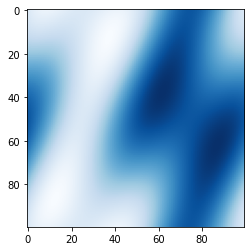

In [27]:
plt.imshow(z, cmap='Blues')

### Petit Exo

In [28]:
# Testons avec un dataset connu de scikit : les Iris
from sklearn.datasets import load_iris

iris = load_iris()

dataset = {f"Parametre {i}": x[:,i] for i in zip(range(4))}  # iris.target_names

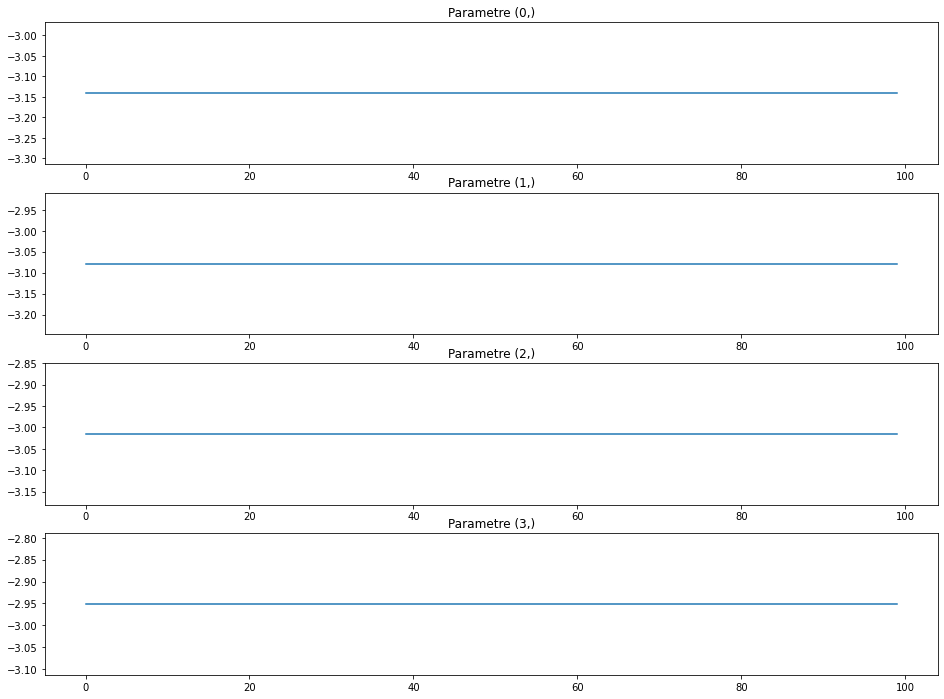

In [29]:
def plot(dataset, heigh=5):
    plt.figure(figsize=(16, len(dataset.keys())*heigh))
    n = len(dataset)
    
    for key, subplot in zip(dataset.keys(), range(n)):
        plt.subplot(n, 1, subplot + 1)
        plt.plot(dataset[key])
        plt.title(key)
        
    plt.show
    
plot(dataset, heigh=3)

[Back to top](#top)

---

## 2. Seaborn<a id="chap2plot"></a>

Seaborn est la librairie de data viz pour faire des visus complexes. Basée sur Pandas et Matplotlib, la librairie cherche à tout simplifier afin d'écrire le moins de code possible !

Voyons ça !

[Back to top](#top)

---

### 2.1. Seaborn - Base<a id="chap2-1plot"></a>

In [30]:
import seaborn as sns
import pandas as pd

In [31]:
# Reprenons nos Iris et mettons les dans un pandas.dataframe
"""
df_iris = pd.DataFrame(iris.data, columns=['Longueur sepale', 'Largeur sepale',
                                           'Longueur petale', 'Largeur petale']
"""

df_iris = pd.read_csv(find_file('Iris.csv'))
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


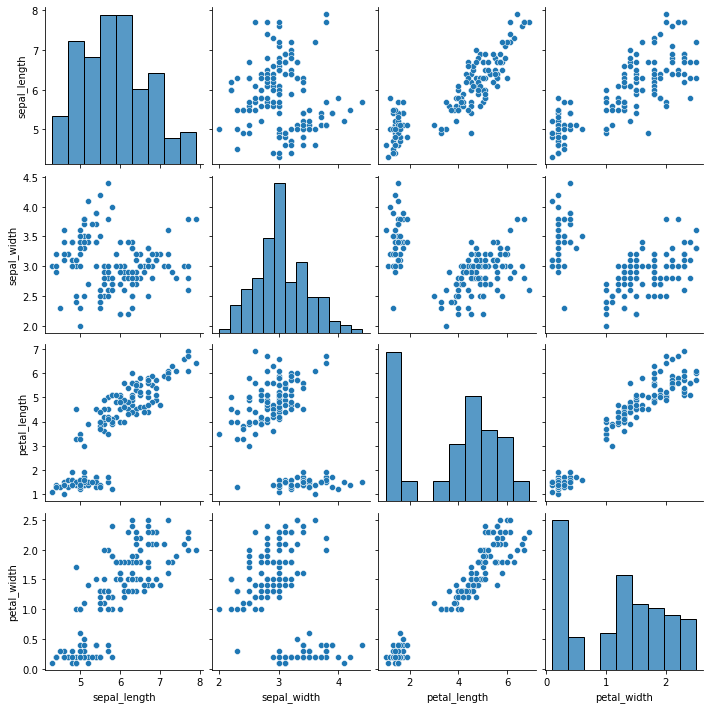

In [32]:
sns.pairplot(df_iris)

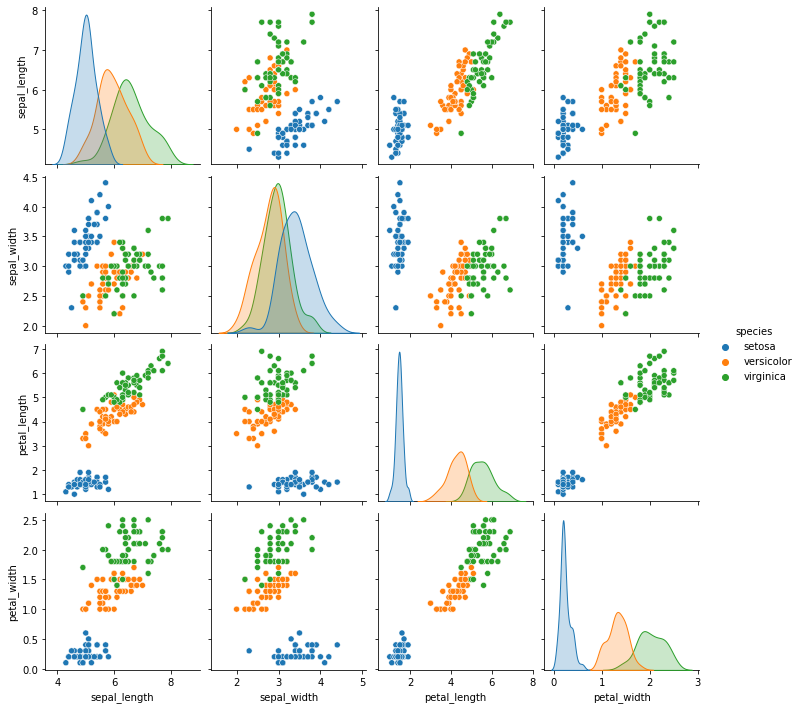

In [33]:
sns.pairplot(df_iris, hue='species')

N'est-ce pas magique ?

Pour résumer, on a juste à suivre cette structure et la magie opère :
```python
sns.fontion(x, y, data, hue, size, style)
```
Par exemple :

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

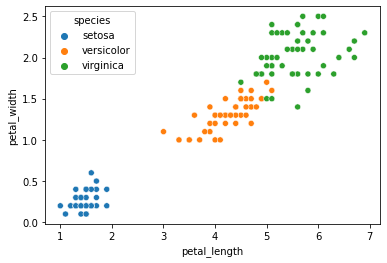

In [34]:
sns.scatterplot(x='petal_length', y='petal_width', data=df_iris, hue='species')

[Back to top](#top)

---

### 2.2. Seaborn - Overview<a id="chap2-2plot"></a>

In [35]:
# On va load les datas du titanic
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [36]:
titanic = titanic.drop(['alone', 'alive', 'who', 'adult_male', 'embark_town', 'class'], axis=1)
titanic.dropna(axis=0, inplace=True)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
1,1,1,female,38.0,1,0,71.2833,C,C
3,1,1,female,35.0,1,0,53.1000,S,C
6,0,1,male,54.0,0,0,51.8625,S,E
10,1,3,female,4.0,1,1,16.7000,S,G
11,1,1,female,58.0,0,0,26.5500,S,C


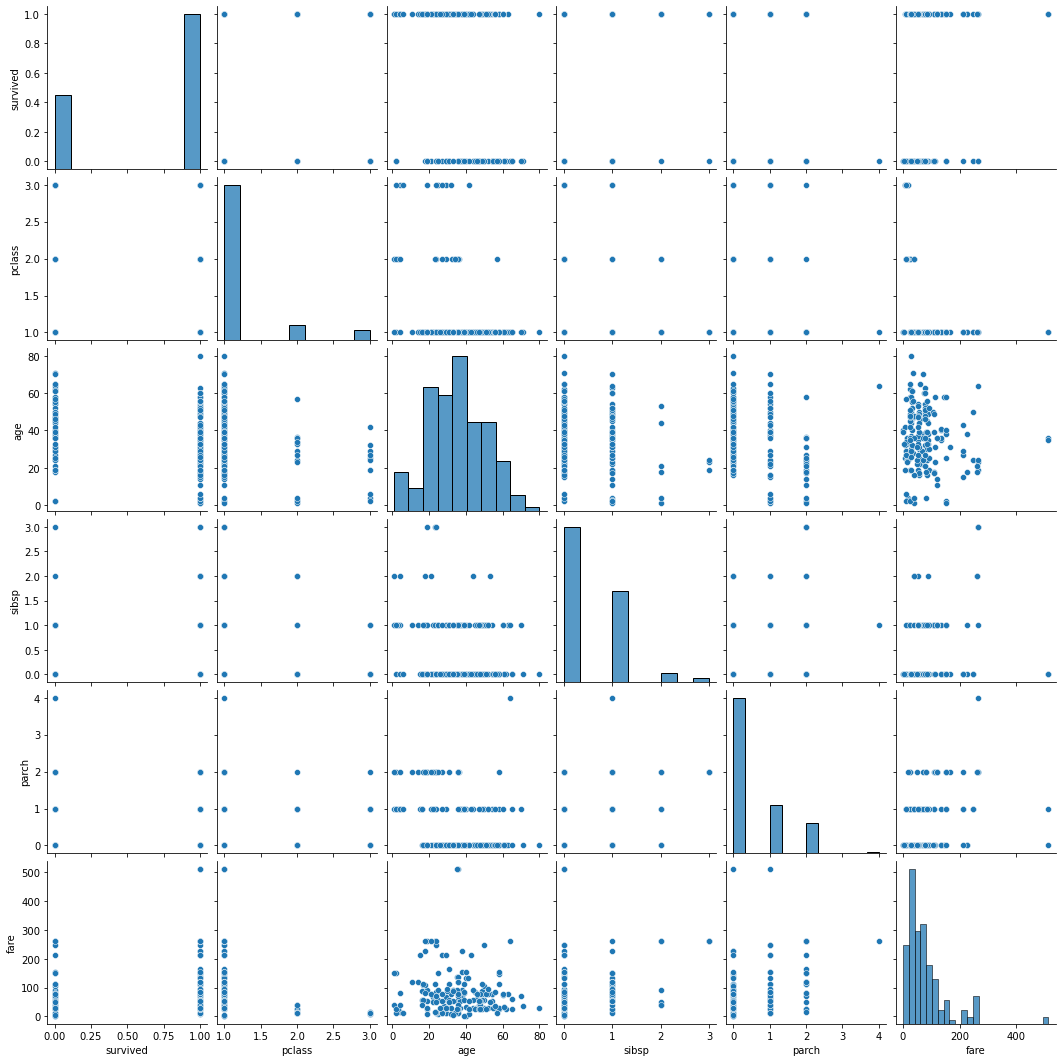

In [37]:
sns.pairplot(titanic)

Pas le best graphique pour visualiser ces données mais intéressant comme appercu. Testons avec un catplot :

<AxesSubplot:xlabel='pclass', ylabel='age'>

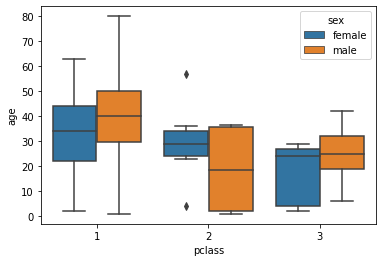

In [38]:
sns.boxplot(x='pclass', y='age', data=titanic, hue='sex')

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

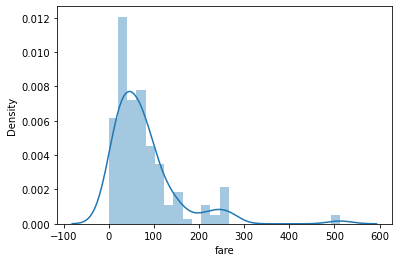

In [39]:
# étudions la distribution du prix du billet
sns.distplot(titanic['fare'])

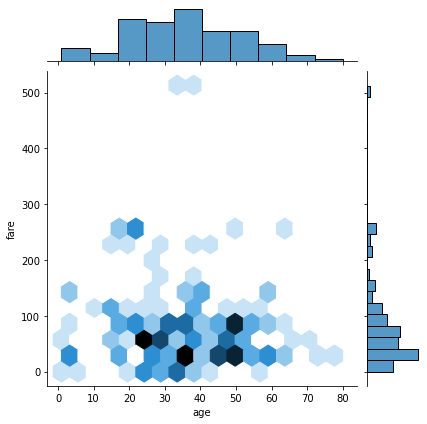

In [40]:
sns.jointplot(x='age', y='fare', data=titanic, kind='hex')

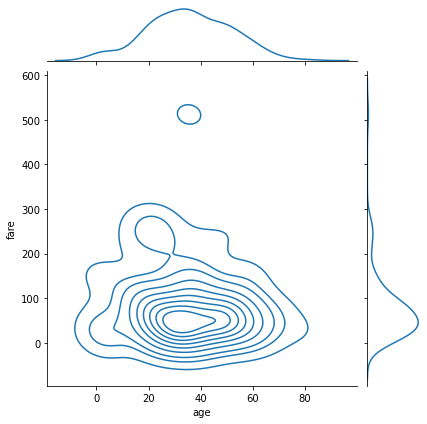

In [41]:
sns.jointplot(x='age', y='fare', data=titanic, kind='kde')

Enfin la dernière méthode très cool est la méthode heatmap, très utile pour visualiser les matrices de corrélation :

<AxesSubplot:>

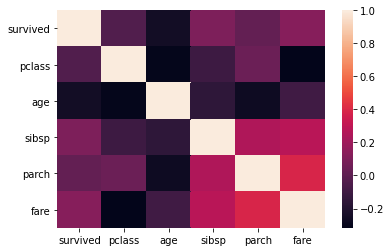

In [42]:
sns.heatmap(titanic.corr())

[Back to top](#top)

---

Thibault **Santonja**

2021